In [ ]:
!pip install librosa

In [ ]:
# For Audio Preprocessing
import librosa
import librosa.display as dsp
from IPython.display import Audio

# For Data Preprocessing
import pandas as pd
import numpy as np
import os

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


#The data is provided as a zip file
import zipfile
import os

In [ ]:
sns.set_style('dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'Audio_MNIST_Archive.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
def get_audio(digit = 0):

    # Audio Sample Directory
    sample = np.random.randint(1, 10)

    # Index of Audio
    index = np.random.randint(1, 5)

    # Modified file location
    if sample < 10:
        file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

    else:
        file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"


    # Get Audio from the location
    # Audio will be automatically resampled to the given rate (default sr = 22050)
    data, sample_rate = librosa.load(file)

    # Plot the audio wave
    dsp.waveshow(data, sr = sample_rate)
    plt.show()

    # Show the widget
    return Audio(data = data, rate = sample_rate)

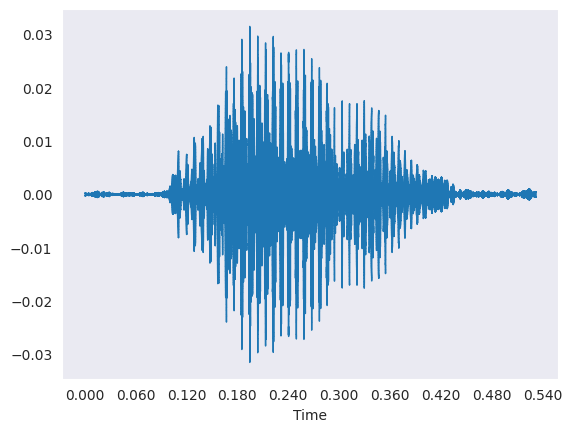

In [ ]:
# Show the audio and plot of digit 0
get_audio(1)

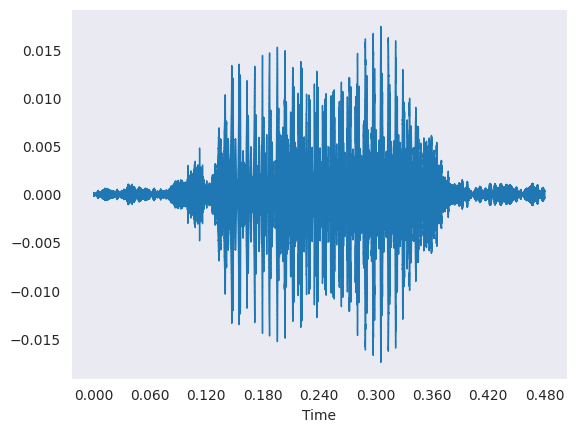

In [ ]:
get_audio(3)


### Observations:

The horizontal axis, or X-axis, represents time, while the vertical axis, or Y-axis, represents the amplitude of vibrations.
The underlying principle of the Fourier Transform is that any wave can be analyzed or decomposed into a combination of multiple sine waves. Since these sine waves are symmetrical around the time axis, they extend equally above and below the time axis at any given moment.
By examining the various audio plots ranging from 0 to 9, we can observe the amplitude at specific points in time. For instance, when we refer to "Zero," the "Z" sound exhibits a lower amplitude, whereas the "ero" sound has a higher amplitude. Similarly, the remaining digits can be interpreted by analyzing the visual representations.

### Spectrogram
A spectrogram is a visual representation that illustrates the intensity or "loudness" of a signal across different frequencies or time intervals within a given waveform. By capturing the amplitude, frequency, and time aspects in a single plot, spectrograms offer a comprehensive depiction of our audio.

Due to their continuous nature, spectrograms can be perceived as images. Each spectrogram may have distinct characteristics on its axes, and their interpretation can vary. In the realm of Research and Development, vocoders play a crucial role. These encoders employ machine learning-derived parameters to convert spectrograms back into audio. Notably, the WaveNet vocoder stands out as a highly regarded choice, commonly employed in various Text-to-Speech architectures.

For our purposes, we will utilize MFCC spectrograms, also known as Mel spectrograms.

In [ ]:
# A function which returns audio file for a mentioned digit
def get_audio_raw(digit = 0):

    # Audio Sample Directory
    sample = np.random.randint(1, 10)

    # Index of Audio
    index = np.random.randint(1, 5)

    # Modified file location
    if sample < 10:
        file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

    else:
        file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"


    # Get Audio from the location
    data, sample_rate = librosa.load(file)

    # Return audio
    return data, sample_rate

## Extracting features from the audio file
Mel-frequency cepstral coefficients (MFCCs) Feature Extraction

MFCCs are usually the final features used in many machine learning models trained on audio data. They are usually a set of mel coefficients defined for each time step through which the raw audio data can be encoded. So for example, if we have an audio sample extending for 30 time steps, and we are defining each time step by 40 Mel Coefficients, our entire sample can be represented by 40 * 30 Mel Coefficients. And if we want to create a Mel Spectrogram out of it, our spectrogram will resemble a 2-D array of 40 horizontal rows and 30 vertical columns.

In this time step, we will first extract the Mel Coefficents for each audio file and add them to our dataset.

extract_features : Returns the MFCC extracted features for an audio file.
process_and_create_dataset : Iterate through the audio of each digit, extract the features using the extract_features() function, and append the data into a DataFrame.
###Creating a function that extracts the data from audio files

In [ ]:
# Will take an audio file as input and return extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT as the output
def extract_features(file):

    # Load audio and its sample rate
    audio, sample_rate = librosa.load(file)

    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y = audio,
                                              sr = sample_rate,
                                              n_mfcc = 40)

    # Scale the extracted features
    extracted_features = np.mean(extracted_features.T, axis = 0)

    # Return the extracted features
    return extracted_features


def preprocess_and_create_dataset():

    # Path of the folder where the audio files are present
    root_folder_path = "/content/data/"

    # Empty List to create dataset
    dataset = []

    # Iterating through folders where each folder has the audio of each digit
    for folder in tqdm(range(1, 11)):

        if folder < 10:

            # Path of the folder
            folder = os.path.join(root_folder_path, "0" + str(folder))

        else:
            folder = os.path.join(root_folder_path, str(folder))

        # Iterate through each file of the present folder
        for file in tqdm(os.listdir(folder)):

            # Path of the file
            abs_file_path = os.path.join(folder, file)

            # Pass path of file to the extracted_features() function to create features
            extracted_features = extract_features(abs_file_path)

            # Class of the audio, i.e., the digit it represents
            class_label = file[0]

            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features, class_label])

    # After iterating through all the folders, convert the list to a DataFrame
    return pd.DataFrame(dataset, columns = ['features', 'class'])

In [ ]:
# Create the dataset by calling the function
dataset = preprocess_and_create_dataset()

100%|██████████| 10/10 [01:27<00:00,  8.74s/it]


In [ ]:
dataset.head()

,features,class
0,"[-672.819, 146.97658, 28.870617, 24.436916, 20...",1
1,"[-620.54895, 96.64838, 11.335957, 31.944641, 1...",0
2,"[-593.63116, 100.18337, 18.78759, 25.165436, 2...",0
3,"[-637.7263, 98.26223, 25.930225, 30.712004, 21...",2
4,"[-609.7016, 132.2011, 0.15404926, 30.897573, 3...",9


In [ ]:
dataset.shape

(5000, 2)

In [ ]:
dataset.features

0       [-672.819, 146.97658, 28.870617, 24.436916, 20...
1       [-620.54895, 96.64838, 11.335957, 31.944641, 1...
2       [-593.63116, 100.18337, 18.78759, 25.165436, 2...
3       [-637.7263, 98.26223, 25.930225, 30.712004, 21...
4       [-609.7016, 132.2011, 0.15404926, 30.897573, 3...
                              ...                        
4995    [-640.37476, 97.22579, 14.967609, 46.921066, 2...
4996    [-642.92444, 116.112404, 28.144554, 37.353313,...
4997    [-639.41986, 80.75371, 10.860724, 64.86411, 25...
4998    [-652.1965, 86.78195, 24.909698, 38.49111, 10....
4999    [-626.4021, 79.87329, 16.660423, 39.270977, 19...
Name: features, Length: 5000, dtype: object

In [ ]:
dataset.head()

,features,class
0,"[-672.819, 146.97658, 28.870617, 24.436916, 20...",1
1,"[-620.54895, 96.64838, 11.335957, 31.944641, 1...",0
2,"[-593.63116, 100.18337, 18.78759, 25.165436, 2...",0
3,"[-637.7263, 98.26223, 25.930225, 30.712004, 21...",2
4,"[-609.7016, 132.2011, 0.15404926, 30.897573, 3...",9


In [ ]:
dataset.dtypes

features    object
class       object
dtype: object

In [ ]:
# Storing the class as int
dataset['class'] = [int(x) for x in dataset['class']]

In [ ]:
dataset.dtypes

features    object
class        int64
dtype: object

In [ ]:
# Check the frequency of classes in the dataset
dataset['class'].value_counts()

1    500
0    500
2    500
9    500
8    500
7    500
3    500
4    500
6    500
5    500
Name: class, dtype: int64

####Visualizing the Mel Frequency Cepstral Coefficients Using a Spectrogram
draw_spectrograms : From the Mel Coefficients we are extracting for a particular audio, this function is creating the 2-D graph of those coefficients with the X-axis representing time and the Y-axis shows the corresponding Mel coefficients in that time step.

In [ ]:
# A function which returns MFCC
def draw_spectrograms(audio_data, sample_rate):

    # Extract features
    extracted_features = librosa.feature.mfcc(y = audio_data,
                                              sr = sample_rate,
                                              n_mfcc = 40)

    # Return features without scaling
    return extracted_features

The very first MFCC coefficient (0th coefficient) does not provide information about the overall shape of the spectrum. It simply communicates a constant offset or the addition of a constant value to the full spectrum. As a result, when performing classification, many practitioners will disregard the initial MFCC. In the images, you can see those represented by blue pixels.

We can plot the MFCCs, but it's difficult to tell what kind of signal is hiding behind such representation.

Shape of MFCC of audio digit 0 --->  (40, 25)
Shape of MFCC of audio digit 1 --->  (40, 26)
Shape of MFCC of audio digit 2 --->  (40, 21)
Shape of MFCC of audio digit 3 --->  (40, 22)
Shape of MFCC of audio digit 4 --->  (40, 21)
Shape of MFCC of audio digit 5 --->  (40, 29)
Shape of MFCC of audio digit 6 --->  (40, 32)
Shape of MFCC of audio digit 7 --->  (40, 28)
Shape of MFCC of audio digit 8 --->  (40, 26)
Shape of MFCC of audio digit 9 --->  (40, 25)


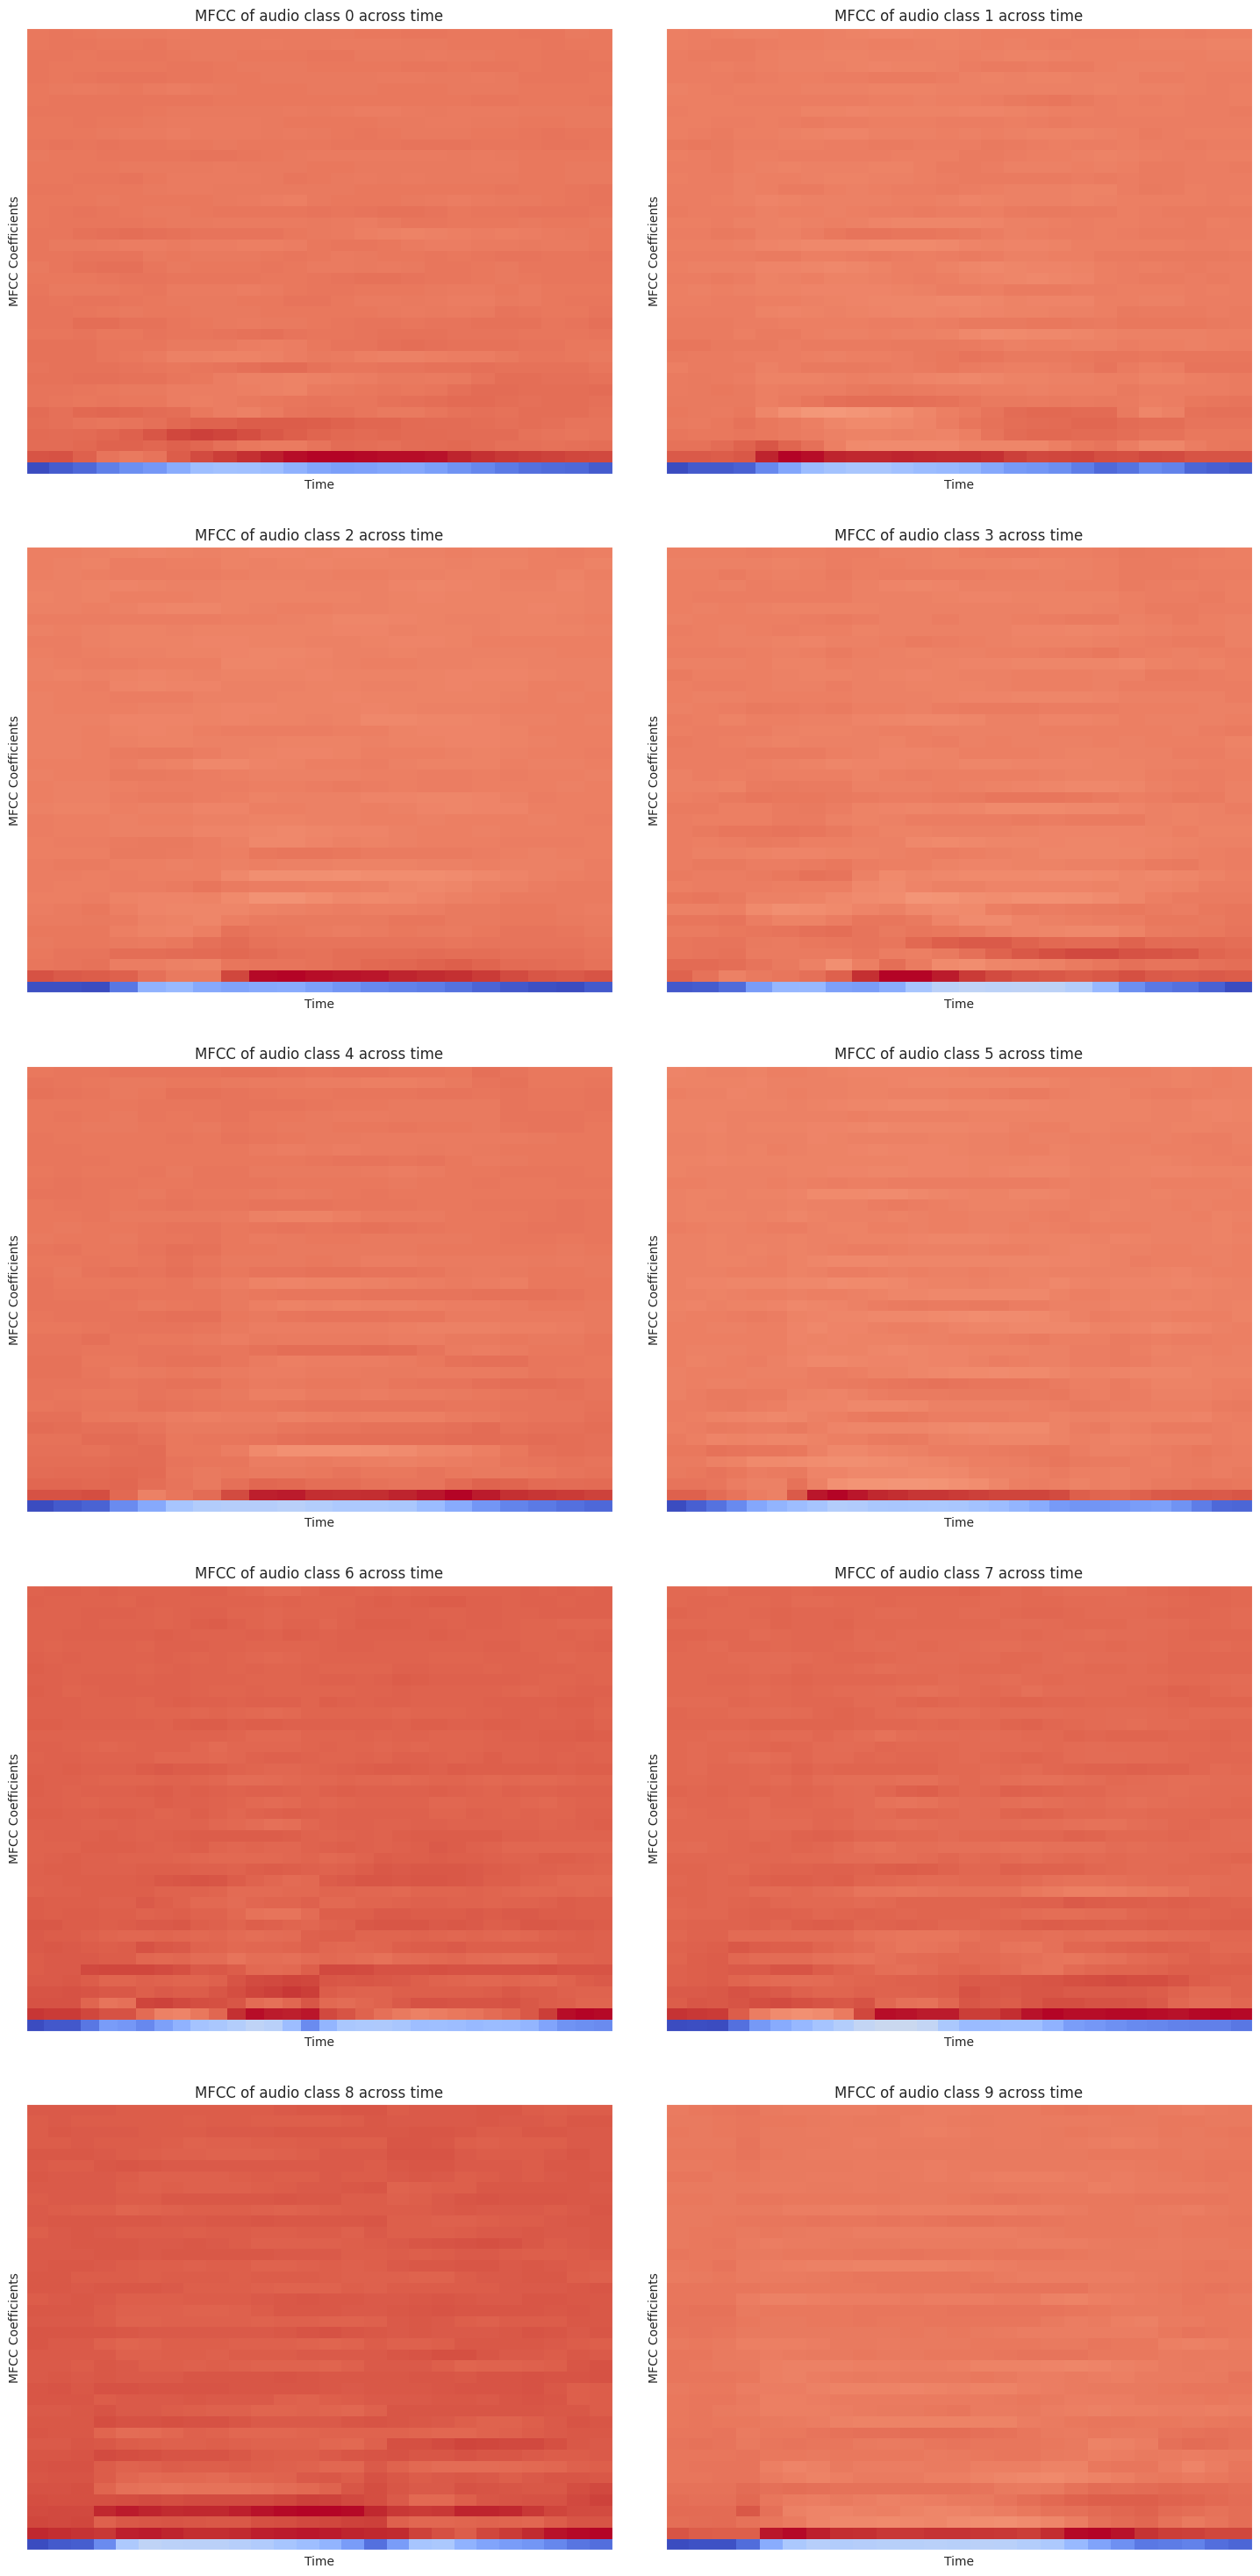

In [ ]:
# Creating subplots
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):

    # Get the audio of different classes (0-9)
    audio_data, sample_rate = get_audio_raw(digit)

    # Extract their MFCC
    mfcc = draw_spectrograms(audio_data, sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ", mfcc.shape)

    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc, sr = 22050, ax = ax[row, column])

    # Set X-labels and Y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")

    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1


plt.tight_layout(pad = 3)
plt.show()

##Visual Inspection of MFCC Spectrograms:

On inspecting them visually, we can see that there are a lot of deviations from the spectrograms of one audio to another. There are a lot of tiny rectangles and bars whose positions are unique to each audio. So, the Artificial Neural Network should be able to perform decently well in identifying these audios.

##Perform the Train-Test-Split
Split the data into train and test sets

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

# Create train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, shuffle = True, random_state = 8)

In [ ]:
# Checking the shape of the data
X_train.shape


(3750, 40)

##Modeling
Create an artificial neural network to recognize the digit.
##About the libraries:

Keras: Keras is an open-source deep-learning library in Python. Keras is popular because the API was clean and simple, allowing standard deep learning models to be defined, fit, and evaluated in just a few lines of code.
Sklearn :
Simple and efficient tools for predictive data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable
##Importing the necessary libraries for building the model

In [ ]:
# To create an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint

# To load the model
from tensorflow.keras.models import load_model

# To evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

#Model Creation
##Why are we using Artificial Neural Networks (ANNs)?
When we convert audios to their corresponding spectrograms, we will have similar spectrograms for similar audios irrespective of who the speaker is, and what their pitch and timber is like. So local spatiality is not going to be a problem, meaning convolutional layers or other such feature extraction layers would be unnecessary on top of our fully connected layers, as they would just be adding to our computational redundancy. That means, a simple Artificial Neural Network (Feedforward Neural Network) should be enough for this use case.

We will use a Sequential model with multiple connected hidden layers, and an output layer that returns a single, continuous value.

* A Sequential model is a linear stack of layers. Sequential models can be created by giving a list of layer instances.
* A dense layer of neurons is a simple layer of neurons in which each neuron receives input from all of the neurons in the previous layer.
* The most popular function employed for hidden layers is the rectified linear activation function, or ReLU activation function. It's popular because it's easy to use and effective in getting around the limitations of other popular activation functions like Sigmoid and Tanh.

In [ ]:
# Crete a Sequential Object
model = Sequential()

# Add first layer with 100 neurons to the sequental object
model.add(Dense(100, input_shape = (40, ), activation = 'relu'))

# Add second layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Add third layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Output layer with 10 neurons as it has 10 classes
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Print Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

#Model Checkpoint & Training

In [ ]:
# Set the number of epochs for training
num_epochs = 100

# Set the batch size for training
batch_size = 32

# Fit the model
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
118/118 [==============================] - 2s 17ms/step - loss: 5.3308e-05 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 2/100
118/118 [==============================] - 1s 9ms/step - loss: 5.4096e-05 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9912
Epoch 3/100
118/118 [==============================] - 1s 6ms/step - loss: 5.2356e-05 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 5.0521e-05 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 4.6633e-05 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9904
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 4.2473e-05 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 0.9912
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 4.7015e-05 - accuracy: 1.0000 - val_loss: 

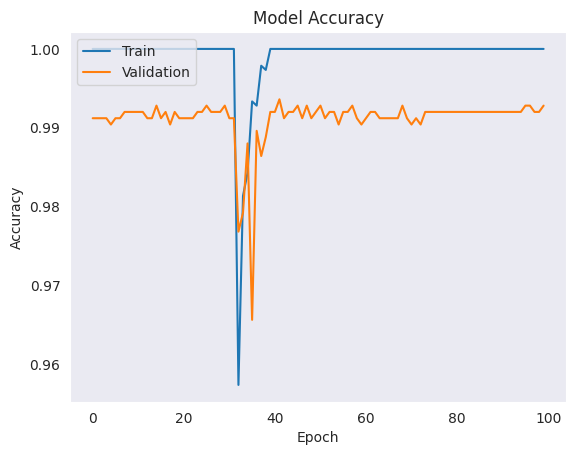

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display plot
plt.show()

# Model Evaulation

In [ ]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

40/40 [==============================] - 0s 2ms/step


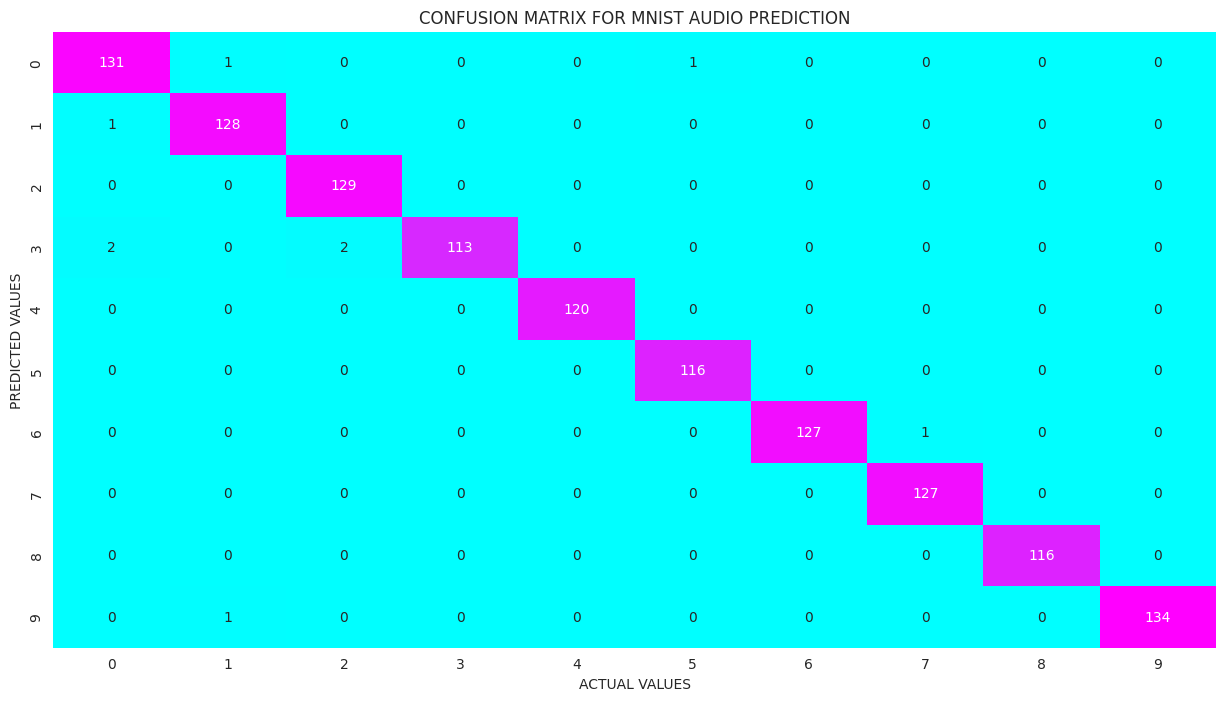

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.98      0.99      0.99       129
           2       0.98      1.00      0.99       129
           3       1.00      0.97      0.98       117
           4       1.00      1.00      1.00       120
           5       0.99      1.00      1.00       116
           6       1.00      0.99      1.00       128
           7       0.99      1.00      1.00       127
           8       1.00      1.00      1.00       116
           9       1.00      0.99      1.00       135

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [ ]:
# Set style as dark
sns.set_style("dark")

# Set figure size
plt.figure(figsize = (15, 8))

# Plot the title
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")

# Confusion matrix
cm = confusion_matrix([int(x) for x in Y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

# Print the metrics
print(classification_report(Y_test, Y_pred))

##Observations:

From the confusion matrix, we can observe that most of the observations are correctly identified by the model.
In very few cases, the model is not able to identify the correct digit. For example, 9 observations are 0 but the model has predicted them as 2.
The model has given a great performance with 99% recall, precision and F1-score.

##Conclusion

Digit Recognition, being an extremely small subset of the general category of Speech Recognition problems, is simple enough that our Artificial Neural Network is able to achieve almost 100% accuracy.
Speech Recognition is a very active area of research, and before the advent of Deep Learning, statistical machine learning methods did not do well on the relatively straight forward problem statement of converting audio recordings of human speech into text.

In the industry, Artificial Neural Networks being the simplest type of Deep Learning architecture find very limited use and are mostly utilized only as a modular component of more advanced Deep Learning architectures.
However ANNs show their worth on tabular data sets which are highly numerical and high in volume - beyond a certain threshold in terms of number of instances, ANNs are able to learn fine patterns from the data in a way that Ensemble techniques or Support Vector Methods struggle to do so, and this is largely due to the hierarchical arrangement of the neurons in the Neural Network.

A digit speech recognition model such as the above may find use in certain applications for voice activated security applications with digit codes, automated telephone operators and the like. However, as always, business considerations such as compute efficiency and model robustness / security are required before such a model can be implemented in real-world settings.